In [57]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [58]:
# Reading and consultation

df = pd.read_csv(r'./SEER Breast Cancer Dataset .csv', encoding='ascii')
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [59]:
# Drop unvalide column 'Unnamed'
df = df.drop(columns=['Unnamed: 3'])
df.columns


Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [60]:
# Nombre de caractéristiques (colonnes) et d'échantillons (lignes)
num_features = df.shape[1]
num_samples = df.shape[0]
print("\nNombre de caractéristiques (colonnes) :", num_features)
print("Nombre d'échantillons (lignes) :", num_samples)


Nombre de caractéristiques (colonnes) : 15
Nombre d'échantillons (lignes) : 7108


In [61]:
# Distribution des statuts (Alive vs Dead)
status_distribution = df['Status'].value_counts()
print("\nDistribution des statuts :")
print(status_distribution)


Distribution des statuts :
Status
Alive     4472
Dead      2634
Status       1
Name: count, dtype: int64


In [62]:
# Spliting the Data into training Set qnd test set
# Conserving data 
dfs = df
# Get The target Status ( "Dead or Alive")
Y = df['Status'] 

# Choosing features/inputs
dfs = dfs.drop(columns=['Status'])
print("this is dfs columns : ",dfs.columns)
X = dfs[dfs.columns]
'''X = dfs[['Age', 'Race ','N Stage','T Stage ', '6th Stage',
          'A Stage', 'Tumor Size', 'Estrogen Status',
         'Reginol Node Positive']]'''

# Train_Set and Test_Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Inputs :  \n", X_train.columns)
print("Target :  \n", y_train)


this is dfs columns :  Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')
Inputs :  
 Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')
Target :  
 3606    Alive
794     Alive
3366    Alive
1536    Alive
1561    Alive
        ...  
3772    Alive
5191     Dead
5226    Alive
5390    Alive
860      Dead
Name: Status, Length: 5686, dtype: object


this is the prediction :  [1 0 1 ... 0 0 1]


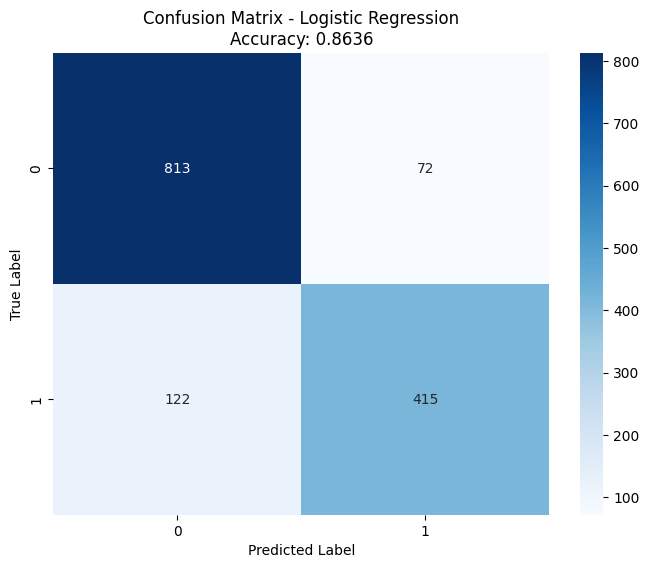


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       885
           1       0.85      0.77      0.81       537

    accuracy                           0.86      1422
   macro avg       0.86      0.85      0.85      1422
weighted avg       0.86      0.86      0.86      1422

this is the prediction :  [0 0 1 ... 0 0 1]


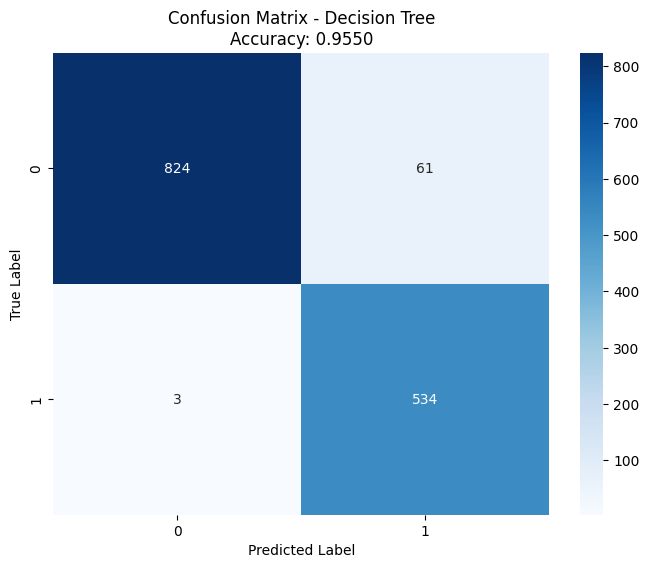


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       885
           1       0.90      0.99      0.94       537

    accuracy                           0.95      1422
   macro avg       0.95      0.96      0.95      1422
weighted avg       0.96      0.95      0.96      1422

this is the prediction :  [0 0 0 ... 0 0 1]


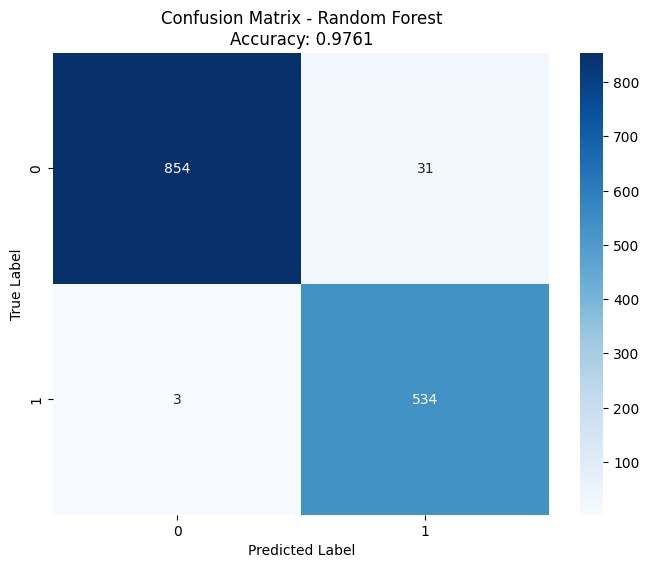


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.95      0.99      0.97       537

    accuracy                           0.98      1422
   macro avg       0.97      0.98      0.97      1422
weighted avg       0.98      0.98      0.98      1422

this is the prediction :  [0 0 0 ... 0 0 1]


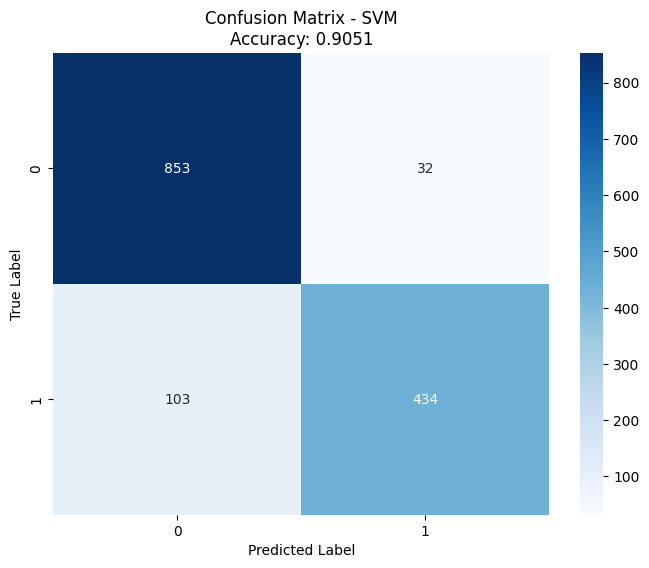


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       885
           1       0.93      0.81      0.87       537

    accuracy                           0.91      1422
   macro avg       0.91      0.89      0.90      1422
weighted avg       0.91      0.91      0.90      1422

this is the prediction :  [0 0 0 ... 0 0 1]


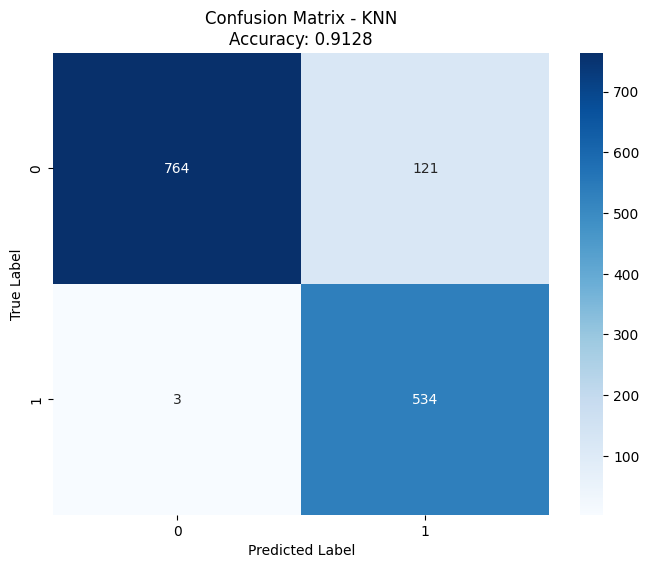


Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       885
           1       0.82      0.99      0.90       537

    accuracy                           0.91      1422
   macro avg       0.91      0.93      0.91      1422
weighted avg       0.93      0.91      0.91      1422


Best Model: Random Forest with Accuracy: 0.9761


In [63]:

# Fitting and Evaluate Models
def train_and_evaluate_models(X_Train, X_Test, y_Train, y_Test):
    # Encode target labels
    le = LabelEncoder()
    y_Train = le.fit_transform(y_Train)
    y_Test = le.transform(y_Test)
    
    # Identify numeric and categorical columns
    numeric_features = X_Train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_Train.select_dtypes(include=['object']).columns

    # Preprocessing for numeric data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessors in a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Define the KNeighborsClassifier with specific parameters
    knn_model = KNeighborsClassifier(
        n_neighbors=7,  
        weights='distance',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric='minkowski'
    )

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'KNN': knn_model
        #'XGBoost': XGBClassifier(random_state=42)
    }
# XGBoost Not Working !!!!!!
    results = {}
    for model_name, model in models.items():
        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Train the model
        pipeline.fit(X_Train, y_Train)
        
        # Make predictions
        y_pred = pipeline.predict(X_Test)
        print("this is the prediction : ", y_pred)
        
        # Evaluate model
        accuracy = accuracy_score(y_Test, y_pred)
        cm = confusion_matrix(y_Test, y_pred)
        cr = classification_report(y_Test, y_pred)
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': cr
        }

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}\nAccuracy: {accuracy:.4f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(f"\nClassification Report for {model_name}:")
        print(cr)

    return results

# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Function to find the best model
def get_best_model(results):
    best_accuracy = 0
    best_model_name = None
    
    for name, result in results.items():
        if result['accuracy'] > best_accuracy:
            best_accuracy = result['accuracy']
            best_model_name = name
    
    return best_model_name, best_accuracy

# Get the best model
best_model_name, best_accuracy = get_best_model(results)
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

